In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
import numpy as np
import pingouin as pg
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_context('notebook')
sns.set_style("ticks")


/usr/local/lib/python3.8/dist-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/usr/local/lib/python3.8/dist-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Data clearning

In [6]:
df = pd.read_csv('data/theresa_single.csv')
df = df[(df['rt1']!=-1) * (df['rt2']!=-1)]
count = 0 
for i in df['prolific_id'].unique():
   count += len(df[df['prolific_id']==i]) == 63
   if len(df[df['prolific_id']==i]) != 63:
       df = df[df['prolific_id']!=i]
df_30 = df[df['round_number']>=30]
# df['prolific_id']

/tmp/ipykernel_1390151/1260452812.py:20: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  plt.gca().spines['left'].set_smart_bounds(True)
/tmp/ipykernel_1390151/1260452812.py:21: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  plt.gca().spines['bottom'].set_smart_bounds(True)


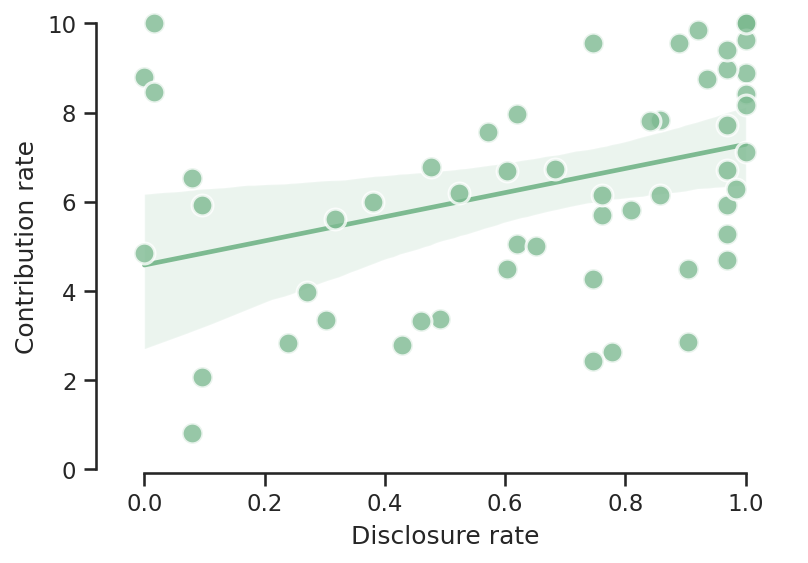

In [6]:

x = df.groupby(['prolific_id'], as_index=True)['disclose'].mean()
y = df.groupby(['prolific_id'], as_index=True)['contribution'].mean()


X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

y2 = model.predict(X)

sns.set_palette('crest')
sns.regplot(
    x=x,
    y=y, scatter_kws={'clip_on': False, 'zorder': 10, 'edgecolor': 'white', 'lw': 1.5, 's': 100})
plt.ylabel('Contribution rate')
plt.xlabel('Disclosure rate')
plt.xlim([-0.08, 1.08])
plt.ylim([-0.08, 10.08])
sns.despine()

plt.gca().spines['left'].set_smart_bounds(True)
plt.gca().spines['bottom'].set_smart_bounds(True)

plt.show()
# print(model.summary())


/tmp/ipykernel_9452/1372247594.py:22: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  plt.gca().spines['left'].set_smart_bounds(True)
/tmp/ipykernel_9452/1372247594.py:23: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  plt.gca().spines['bottom'].set_smart_bounds(True)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.43363,54,two-sided,0.001151,"[-3.96, -1.04]",0.917676,27.597,0.921023


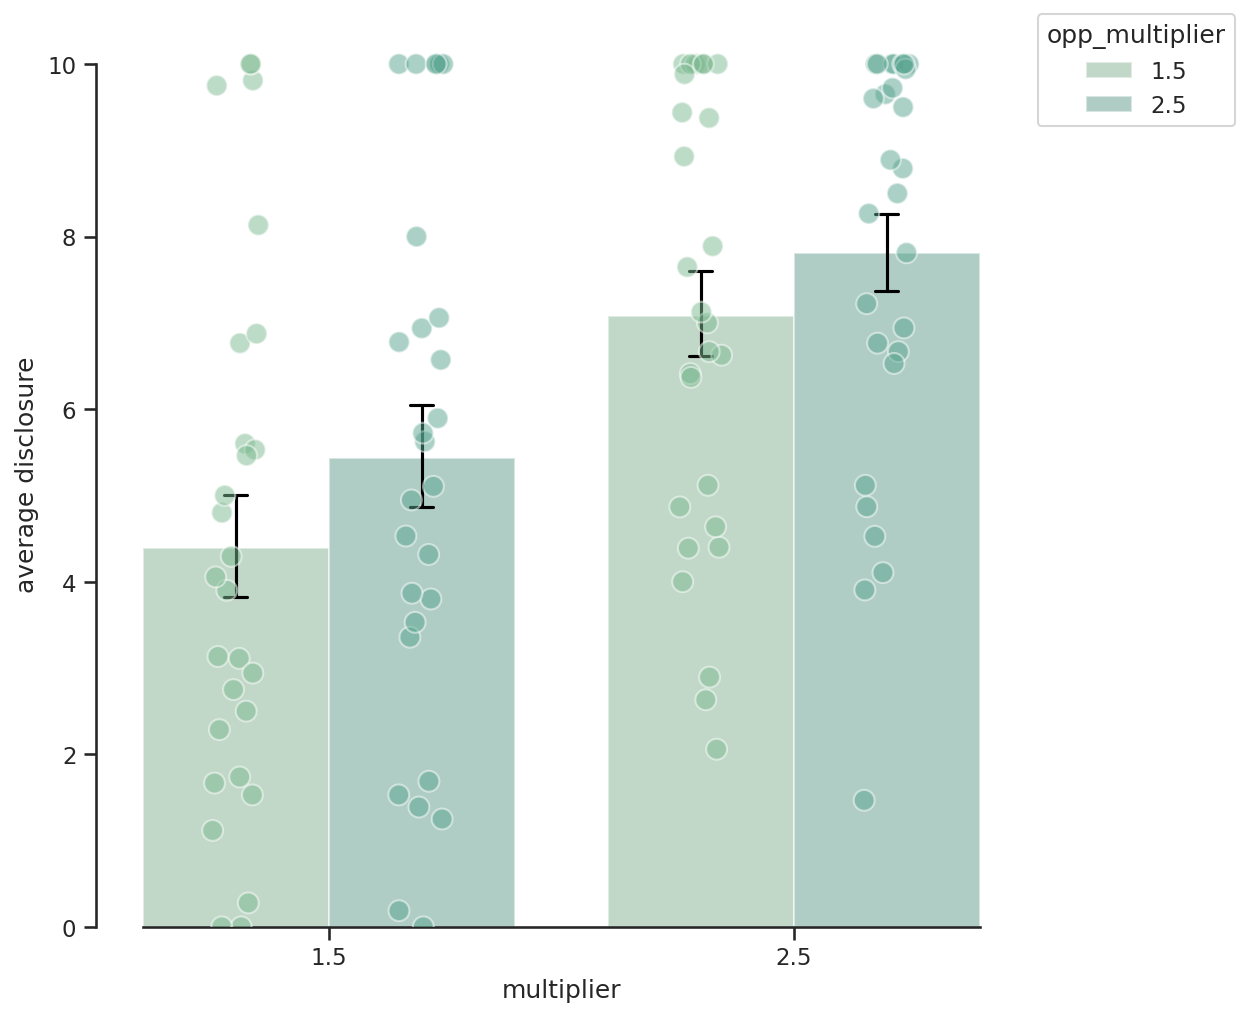

In [9]:
vd = 'contribution'

fig, ax = plt.subplots(figsize=(8, 8))
df2 = df_30.groupby(['prolific_id', 'multiplier',
                    'opp_multiplier'], as_index=False)[vd].mean()

sns.set_palette("crest")
sns.barplot(
    x='multiplier',
    y=vd,
    hue='opp_multiplier', data=df2, ci=68,
    edgecolor="white",
    errcolor="black",
    errwidth=1.5,
    capsize=0.05,
    alpha=0.5, ax=ax)

sns.stripplot(x='multiplier', y=vd, hue='opp_multiplier', data=df2, dodge=True,
              jitter=True, ax=ax, alpha=0.5, size=10, edgecolor='white', linewidth=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], labels[2:], title='opp_multiplier',
          bbox_to_anchor=(1, 1.02), loc='upper left')
sns.despine(right=True, top=True)

plt.ylabel('average disclosure')

plt.gca().spines['left'].set_smart_bounds(True)
plt.gca().spines['bottom'].set_smart_bounds(True)


df3 = df_30.groupby(['prolific_id', 'multiplier'], as_index=False)[vd].mean()
pg.ttest(x=df3[df3['multiplier'] == 1.5][vd],
         y=df3[df3['multiplier'] == 2.5][vd])


/tmp/ipykernel_1390151/2040947798.py:20: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  plt.gca().spines['left'].set_smart_bounds(True)
/tmp/ipykernel_1390151/2040947798.py:21: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  plt.gca().spines['bottom'].set_smart_bounds(True)


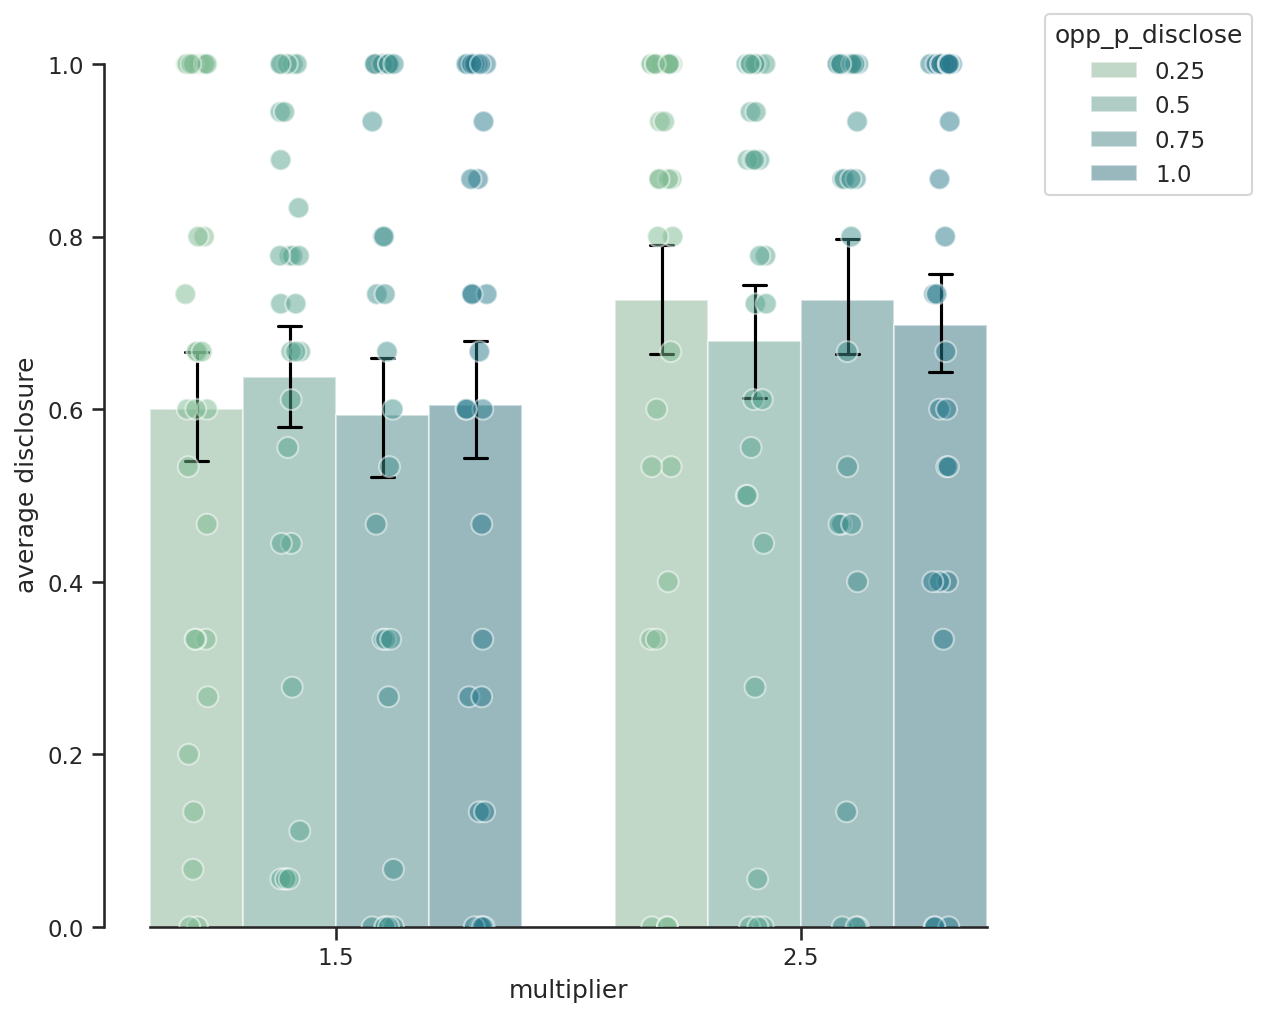

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
df2 = df.groupby(['prolific_id', 'opp_p_disclose', 'multiplier'], as_index=False)['disclose'].mean()

sns.set_palette("crest")
sns.barplot(x='multiplier', y='disclose', hue='opp_p_disclose', data=df2, ci=68, 
    edgecolor="white",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.05,
    alpha=0.5, ax=ax)

sns.stripplot(x='multiplier',y='disclose', hue='opp_p_disclose', data=df2, dodge=True, jitter=True, ax=ax, alpha=0.5, size=10, edgecolor='white', linewidth=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], labels[4:], title='opp_p_disclose', bbox_to_anchor=(1, 1.02), loc='upper left')
sns.despine(right=True, top=True)

plt.ylabel('average disclosure')

plt.gca().spines['left'].set_smart_bounds(True)
plt.gca().spines['bottom'].set_smart_bounds(True)



In [1]:

fig, ax = plt.subplots(figsize=(8, 8))
df2 = df.groupby(['prolific_id', 'opp_multiplier', 'multiplier'], as_index=False)['contribution'].mean()
print(len(df2))

sns.barplot(x='multiplier', y='contribution', hue='opp_multiplier', data=df2, ci=68, 
    edgecolor="white",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.05,
    alpha=0.5, ax=ax)

sns.stripplot(x='multiplier',y='contribution', hue='opp_multiplier', data=df2, dodge=True, jitter=True, ax=ax, alpha=0.5)

# pg.pairwise_ttests(dv='contribution', between='multiplier', within=['opp_multiplier'n ] data=df2, correction='bonf', within_first=True)
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[4:], labels[4:], title='opp_p_disclose', bbox_to_anchor=(1, 1.02), loc='upper left')

NameError: name 'plt' is not defined

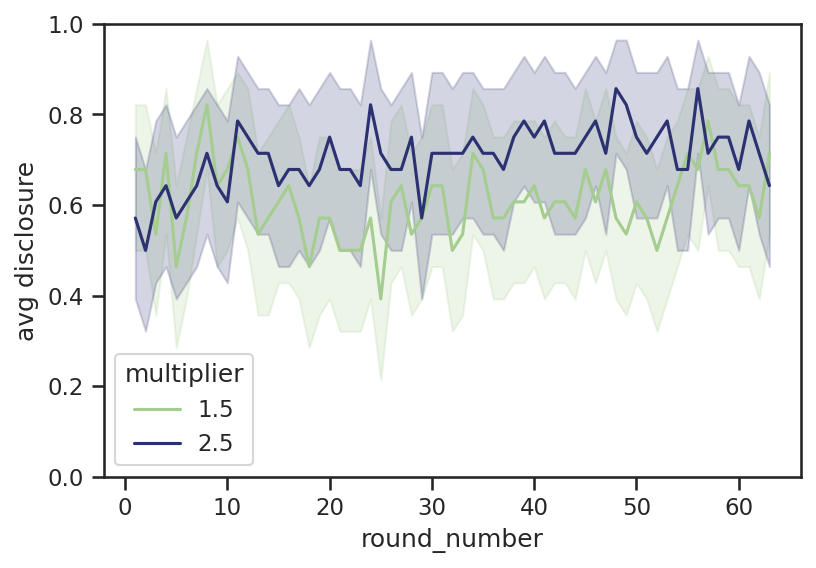

In [10]:

sns.set_palette("crest")

# Plot the responses for different events and regions
sns.lineplot(x="round_number", y="disclose",
             hue="multiplier", 
             data=df, palette='crest')
plt.ylim([0, 1])
plt.ylabel('avg disclosure')
plt.show()